In [3]:
import pandas as pd, numpy as np, seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [4]:
filepath = "C:\Users\Owner\source\vsc_repo\machine_learn_cookbook\Logistic_Regression_Quit-Predict\hr_file.csv"
hr_data = pd.read_csv(filepath, delimiter=",", header=0, engine="python", encoding="utf-8", on_bad_lines="warn")
hr_data.head(5)


,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,salary,Management
0,0.38,0.53,2,157,3,0,1,0,sales,low,31
1,0.80,0.86,5,262,6,0,1,0,sales,medium,71
2,0.11,0.88,7,272,4,0,1,0,sales,medium,8
3,0.72,0.87,5,223,5,0,1,0,sales,low,68
4,0.37,0.52,2,159,3,0,1,0,sales,low,48


In [7]:
hr_data.tail(5)

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,salary,Management
14994,0.40,0.57,2,151,3,0,1,0,support,low,49
14995,0.37,0.48,2,160,3,0,1,0,support,low,3
14996,0.37,0.53,2,143,3,0,1,0,support,low,5
14997,0.11,0.96,6,280,4,0,1,0,support,low,78
14998,0.37,0.52,2,158,3,0,1,0,support,low,99


In [8]:
hr_data.info

<bound method DataFrame.info of        Satisfaction Level  Last Evaluation  Number of Projects  Monthly Hours  \
0                    0.38             0.53                   2            157   
1                    0.80             0.86                   5            262   
2                    0.11             0.88                   7            272   
3                    0.72             0.87                   5            223   
4                    0.37             0.52                   2            159   
...                   ...              ...                 ...            ...   
14994                0.40             0.57                   2            151   
14995                0.37             0.48                   2            160   
14996                0.37             0.53                   2            143   
14997                0.11             0.96                   6            280   
14998                0.37             0.52                   2            158

In [9]:
hr_data.describe()

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Management
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,11.706780
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,25.300786
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,100.000000


In [10]:
hr_data.index

RangeIndex(start=0, stop=14999, step=1)

In [11]:
hr_data.columns

Index(['Satisfaction Level', 'Last Evaluation', 'Number of Projects',
       'Monthly Hours', 'Total Time at the Company', 'Work Accidents',
       'Quit the Company', 'Promoted in Last 5 yrs', 'Departments ', 'salary',
       'Management'],
      dtype='object')

In [5]:
hr_data.dtypes

Satisfaction Level           float64
Last Evaluation              float64
Number of Projects             int64
Monthly Hours                  int64
Total Time at the Company      int64
Work Accidents                 int64
Quit the Company               int64
Promoted in Last 5 yrs         int64
Departments                   object
salary                        object
Management                     int64
dtype: object

In [12]:
# https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
le = LabelEncoder()
hr_data["Departments"] = le.fit_transform(hr_data["Departments "])
hr_data["Salary"] = le.fit_transform(hr_data["salary"])
hr_data.head(5)

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,salary,Management,Departments,Salary
0,0.38,0.53,2,157,3,0,1,0,sales,low,31,7,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,71,7,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,8,7,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,68,7,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,48,7,1


In [13]:
hr_data.corr()

C:\Users\Owner\AppData\Local\Temp\ipykernel_19252\4175524910.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hr_data.corr()


,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Management,Departments,Salary
Satisfaction Level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,-0.318397,0.003153,0.011754
Last Evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.002674,0.007772,0.013965
Number of Projects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.011043,0.009268,0.009672
Monthly Hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.051059,0.003913,0.007082
Total Time at the Company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.119113,-0.018010,-0.003086
Work Accidents,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.129099,0.003425,-0.002506
Quit the Company,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.827767,0.032105,-0.001294
Promoted in Last 5 yrs,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.052868,-0.027336,-0.001318
Management,-0.318397,0.002674,0.011043,0.051059,0.119113,-0.129099,0.827767,-0.052868,1.000000,0.029127,-0.006357
Departments,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,0.029127,1.000000,0.000685


c:\ProgramData\Anaconda3\envs\conda_env\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\Anaconda3\envs\conda_env\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\Anaconda3\envs\conda_env\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\Anaconda3\envs\conda_env\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\Anaconda3\envs\conda_env\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\Anaconda3\envs\conda

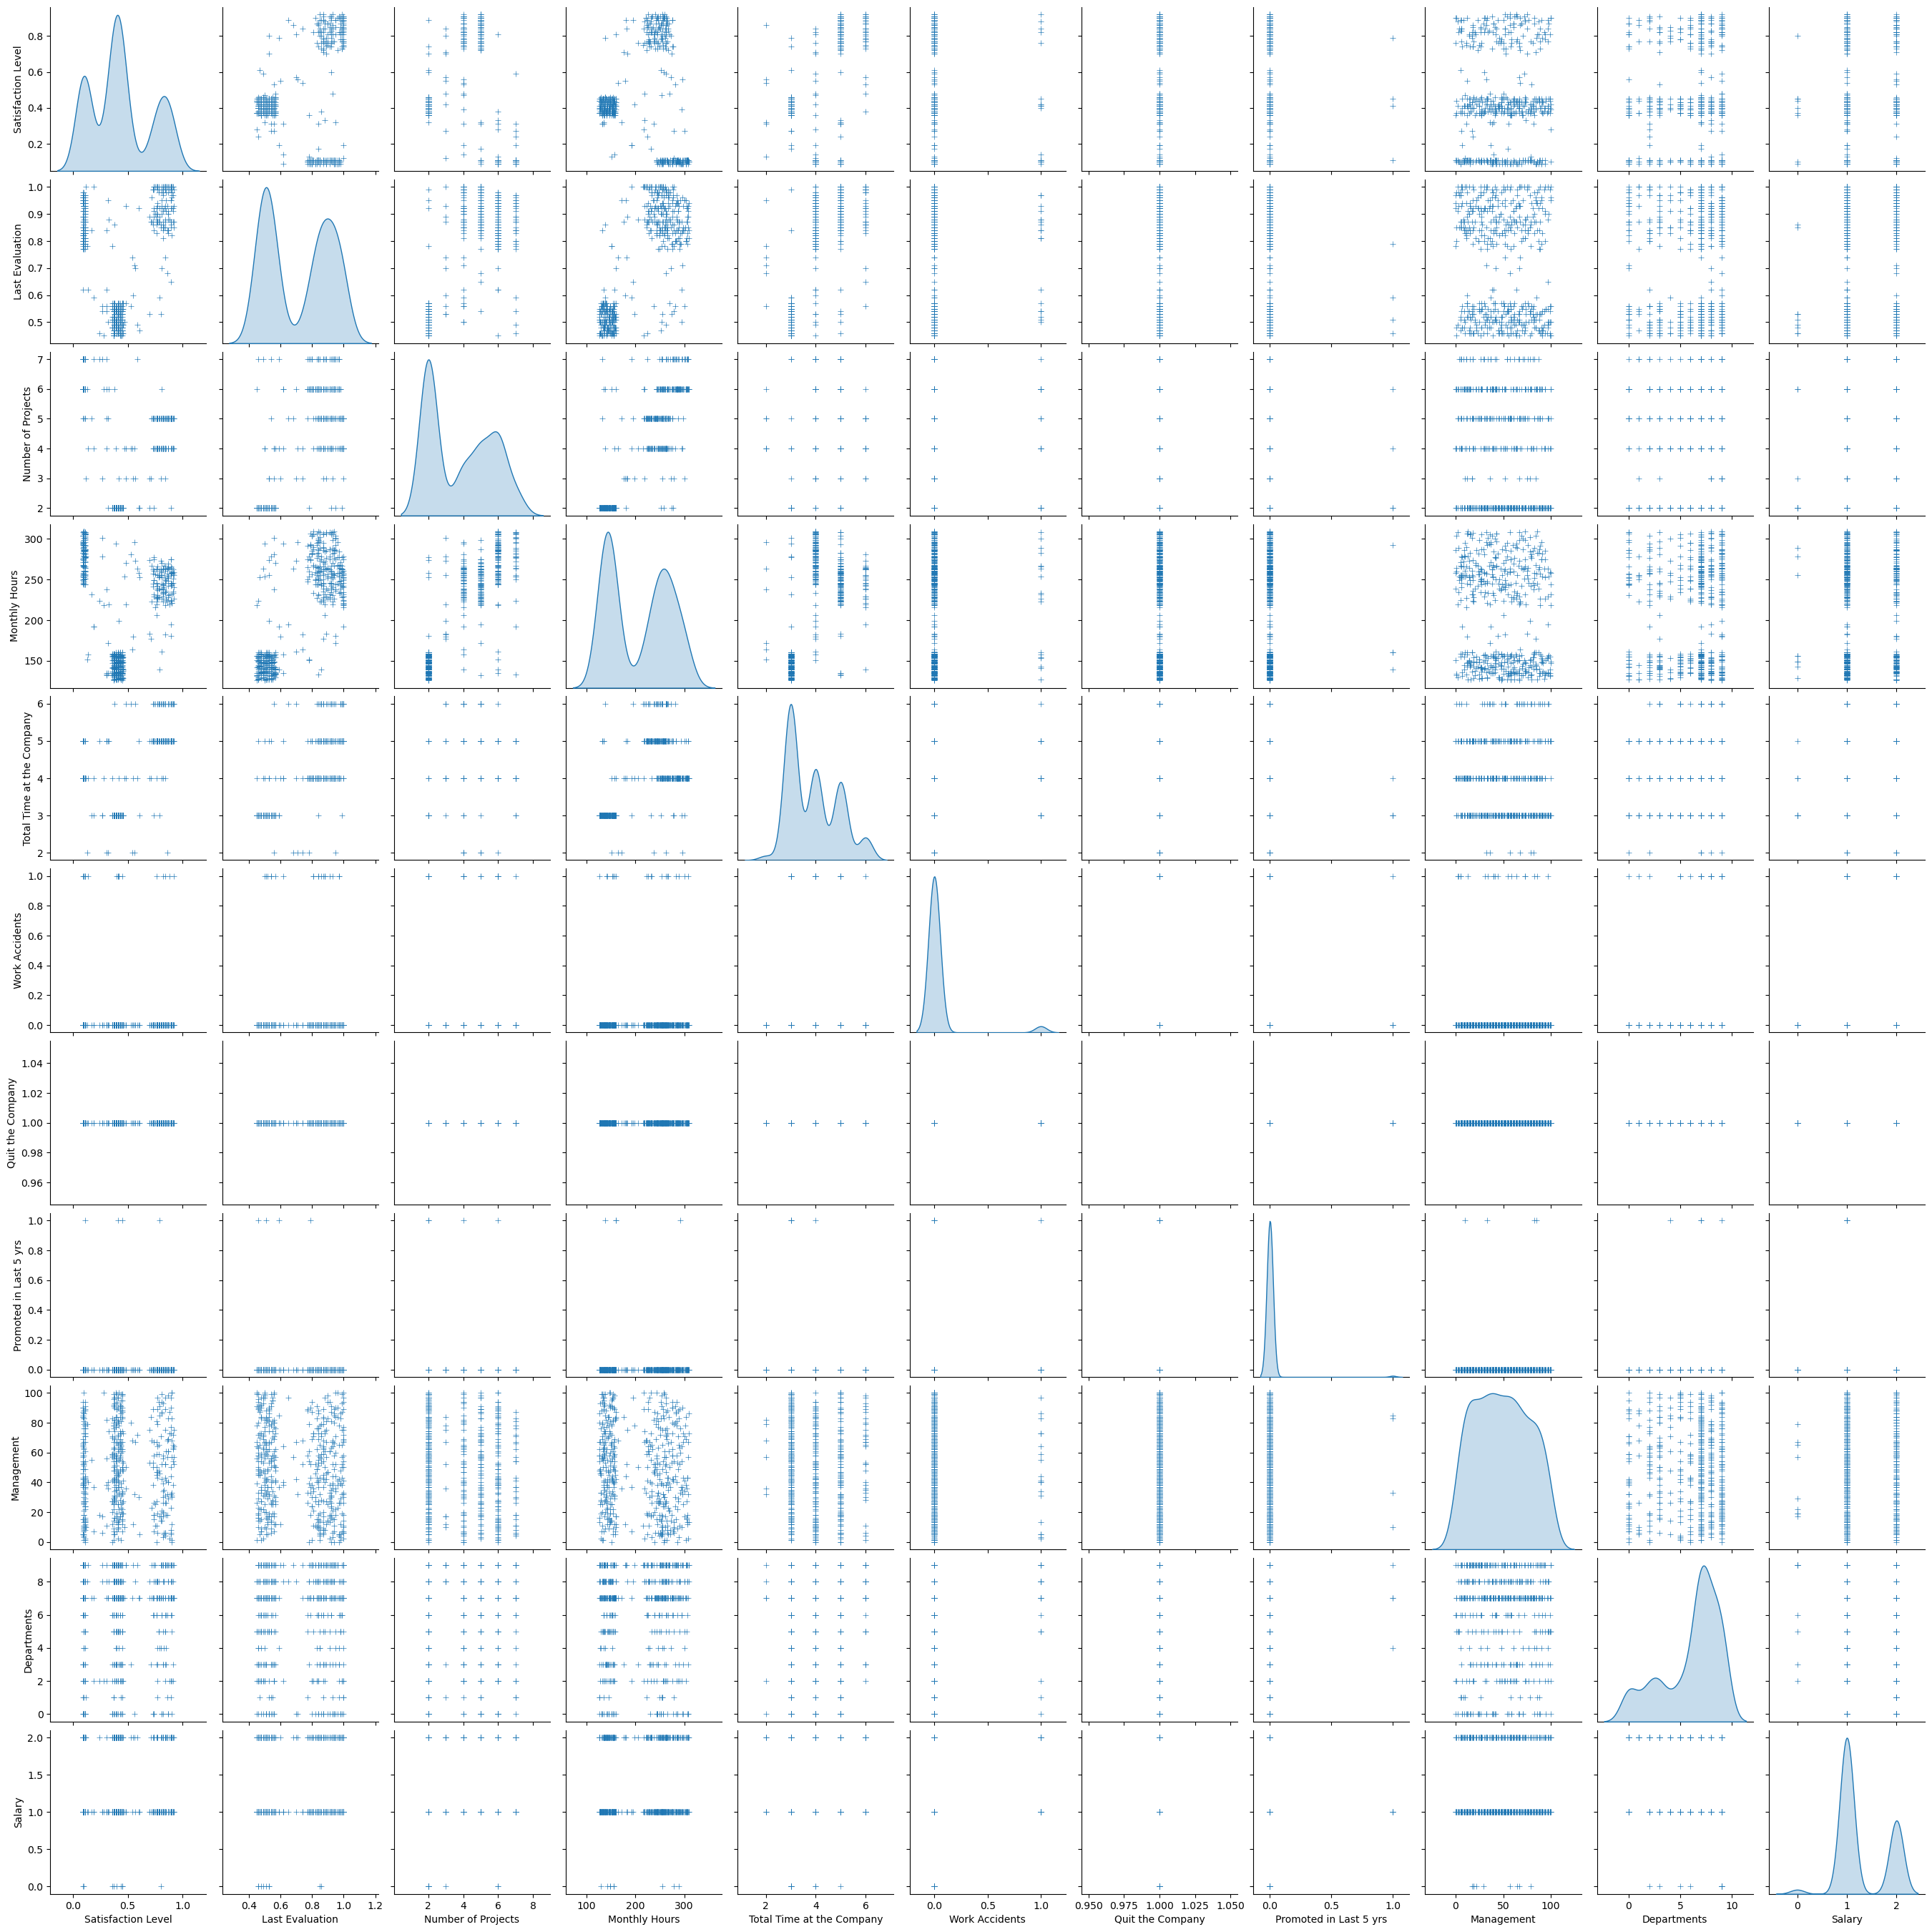

In [16]:
sns.pairplot(hr_data[0:500], kind="scatter", markers="+", diag_kind="kde", palette="tab10");

C:\Users\Owner\AppData\Local\Temp\ipykernel_9428\1895728711.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hr_data.corr())


<AxesSubplot: >

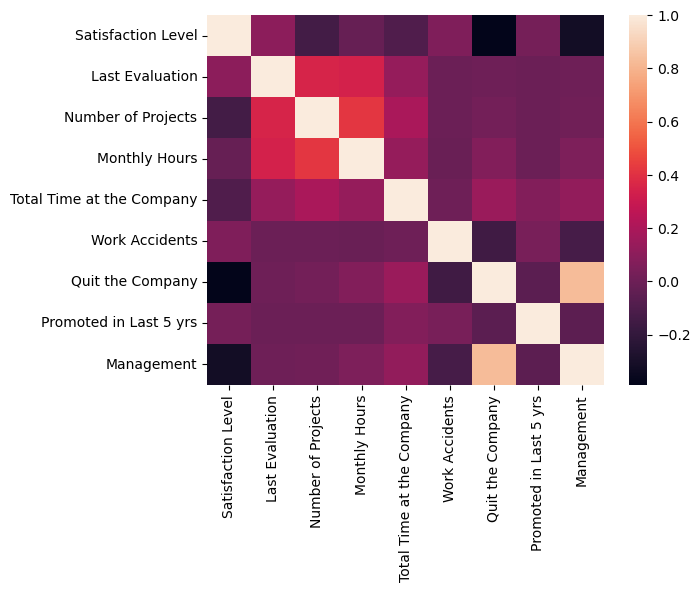

In [6]:
sns.heatmap(hr_data.corr())

In [ ]:
y = hr_data["Quit the Company"]
features = ['Satisfaction Level', 'Last Evaluation', 'Number of Projects',
       'Monthly Hours', 'Total Time at the Company', 'Work Accidents',
       'Promoted in Last 5 yrs', 'Departments', 'Salary',
       'Management']
X = hr_data[features]

In [ ]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, train_size=.25, random_state=101)

In [ ]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_predict = log.predict(X)
y_prob = log.predict_proba(X)[:,1]


In [ ]:
hr_data["Predictions"] = y_predict
hr_data["Probabilities"] = y_prob


In [1]:
log_coef = log.coef_
log_intercept = log.intercept_
print("Logisitic Coefficent: ", log_coef)
print("Logisitic Intercept: ", log_intercept)

NameError: name 'log' is not defined

In [ ]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_predict))
print("Mean Squared Error: ", mean_squared_error(y_test, y_predict))

Mean Absolute Error:  0.017067804520301353
Mean Squared Error:  0.017067804520301353


In [ ]:
hr_data.head(5)

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,salary,Management,Departments,Salary,Predictions,Probabilities
0,0.38,0.53,2,157,3,0,1,0,sales,low,31,7,1,1,0.999982
1,0.80,0.86,5,262,6,0,1,0,sales,medium,71,7,2,1,1.000000
2,0.11,0.88,7,272,4,0,1,0,sales,medium,8,7,2,1,0.835911
3,0.72,0.87,5,223,5,0,1,0,sales,low,68,7,1,1,1.000000
4,0.37,0.52,2,159,3,0,1,0,sales,low,48,7,1,1,1.000000


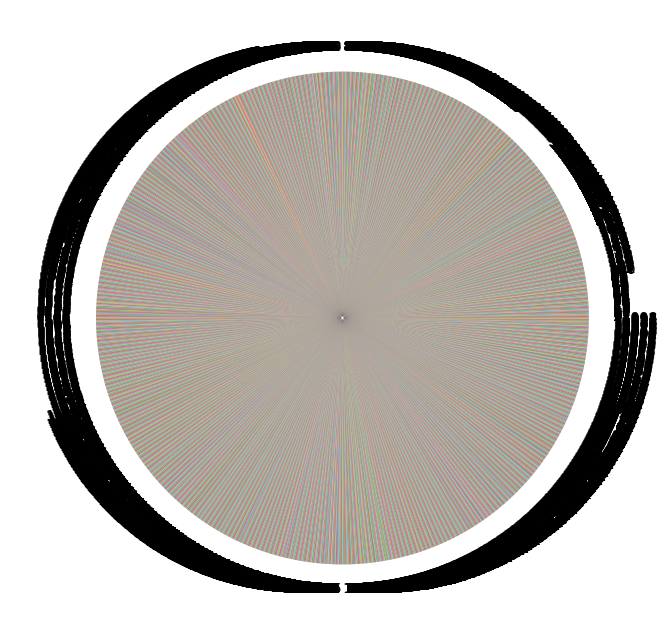

In [ ]:
# Making Art with Science
hr_data["Predictions"].plot.pie(figsize=[10,8], ylabel=" ");